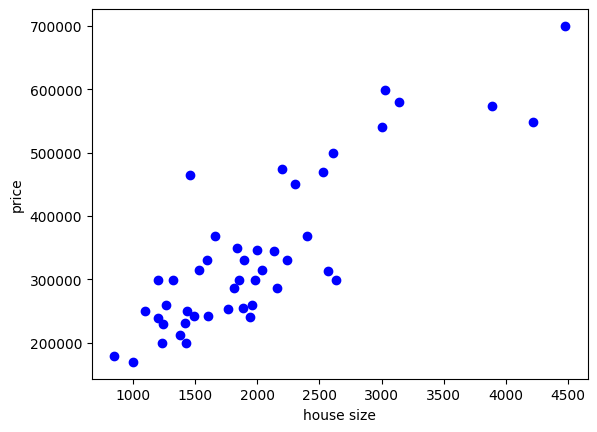

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


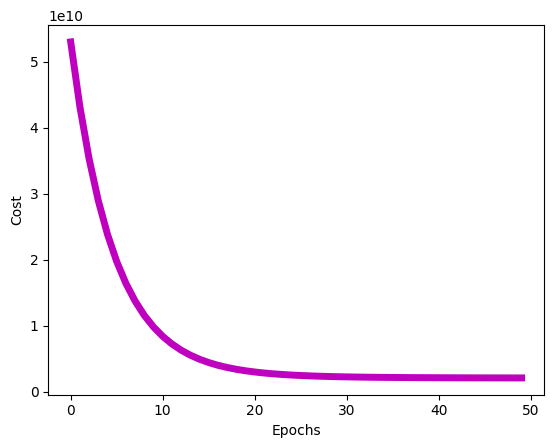

Price of house:  [1.66842816e+08]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#variables to store mean and standard deviation for each feature
mu = []
std = []

def load_data(filename):
	df = pd.read_csv(filename, sep=",", index_col=False)
	df.columns = ["housesize", "rooms", "price"]
	data = np.array(df, dtype=float)
	plot_data(data[:,:2], data[:, -1])
	normalize(data)
	return data[:,:2], data[:, -1]

def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))


def h(x,theta):
	return np.matmul(x, theta)

def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)

x,y = load_data("house_price_data.txt")
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 3])